<a href="https://colab.research.google.com/github/apurva-j9404/AI_bootcamp/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df = df.fillna({
    'price': df['price'].mean(),
    'area': df['area'].mean(),
    'bedrooms': df['bedrooms'].mode()[0],
    'bathrooms': df['bathrooms'].mode()[0],
    'stories': df['stories'].mode()[0],
    'mainroad': 'no',
    'guestroom': 'no',
    'basement': 'no',
    'hotwaterheating': 'no',
    'airconditioning': 'no',
    'parking': df['parking'].mode()[0],
    'prefarea': 'no',
    'furnishingstatus': 'unfurnished'
})

df['price'] = df['price'].astype(float)
df['area'] = df['area'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['stories'] = df['stories'].astype(int)
df['parking'] = df['parking'].astype(int)

#encode categorical variables

df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})



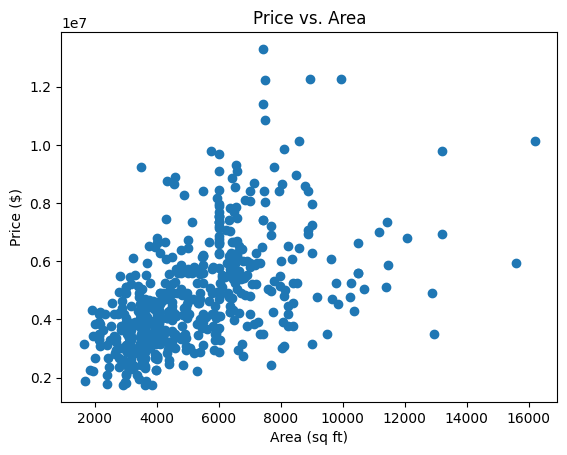

In [8]:
#scatterplot
plt.scatter(df['area'], df['price'])
plt.title('Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.show()

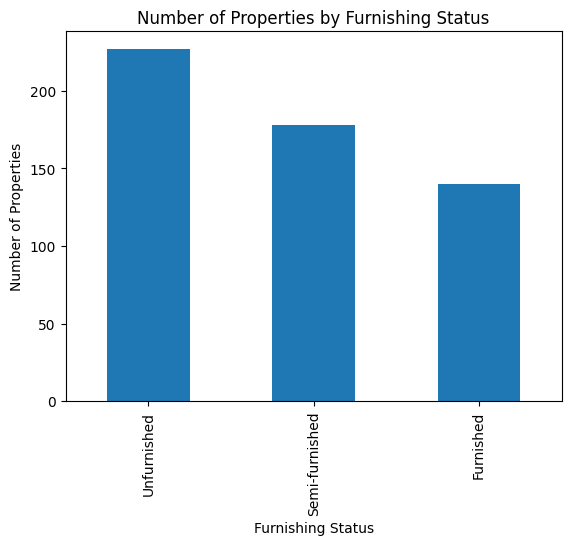

In [9]:
#bar chart
furnishing_counts = df['furnishingstatus'].value_counts()

furnishing_counts.plot(kind='bar')
plt.title('Number of Properties by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Number of Properties')
plt.xticks(ticks=[0, 1, 2], labels=['Unfurnished', 'Semi-furnished', 'Furnished'])
plt.show()


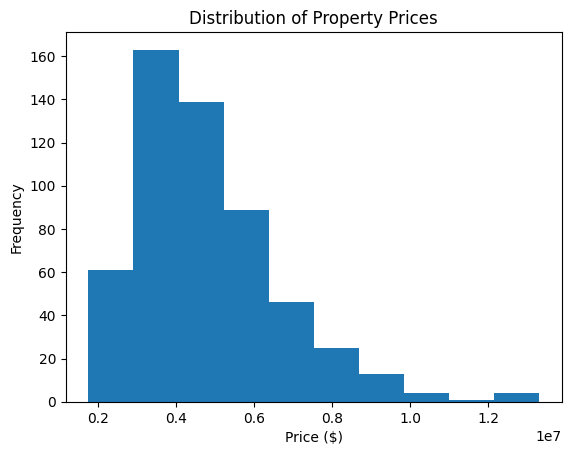

In [10]:
#histogram
plt.hist(df['price'], bins=10)
plt.title('Distribution of Property Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


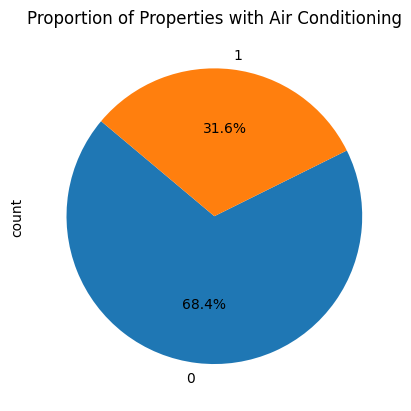

In [11]:
#pie chart
ac_counts = df['airconditioning'].value_counts()

ac_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Properties with Air Conditioning')
plt.show()


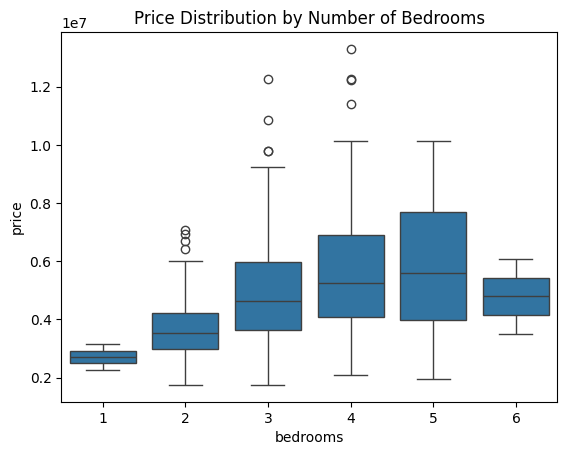

In [12]:
#box plot
import seaborn as sns

sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.show()


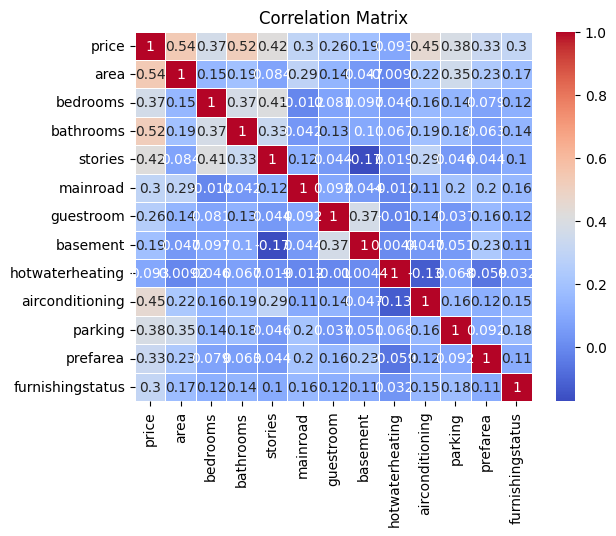

In [13]:
#heatmap
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()